<a href="https://colab.research.google.com/github/Kaystyw/CHAIR/blob/main/IE0005_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**FASHION MNIST DATASET**

It consists of a pixel data of 28x28 grayscale images, associated with a label from 10 classes, of 60,000 images as a train set and 10000 images as test. The labels represent different classes of clothing.

**Labels**

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot


In [ ]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
#Importing the train dataset
train_data=pd.read_csv('/content/drive/MyDrive/fashion-mnist_train.csv')
train_data.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,5,4,5,5,3,5,...,7,8,7,4,3,7,5,0,0,0
6,4,0,0,0,0,0,0,0,0,0,...,14,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,4,0,0,0,0,0,0,3,2,0,...,1,0,0,0,0,0,0,0,0,0
9,8,0,0,0,0,0,0,0,0,0,...,203,214,166,0,0,0,0,0,0,0


In [ ]:
#Importing the test dataset
test_data=pd.read_csv('/content/drive/MyDrive/fashion-mnist_test.csv')
test_data.head(10)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


**Exploratory Data Analysis(EDA):**




In [ ]:
#Number of Rows and Columns
train_data.shape

(60000, 785)

In [ ]:
#Statistical Summary of the data
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


The pixel values range from 0-255.The values of a pixel in an image represent the intensity of light or color at that particular point in the image.


In [ ]:
#Checking the null values in the dataset
print(train_data.isnull().sum())

label       0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel780    0
pixel781    0
pixel782    0
pixel783    0
pixel784    0
Length: 785, dtype: int64


The dataset has no null values.

In [ ]:
#Converting label data to category type
label_data = pd.DataFrame(train_data['label'])
label_data = label_data.astype("category")
print(label_data.dtypes)
label_data.describe()

label    category
dtype: object


,label
count,60000
unique,10
top,0
freq,6000


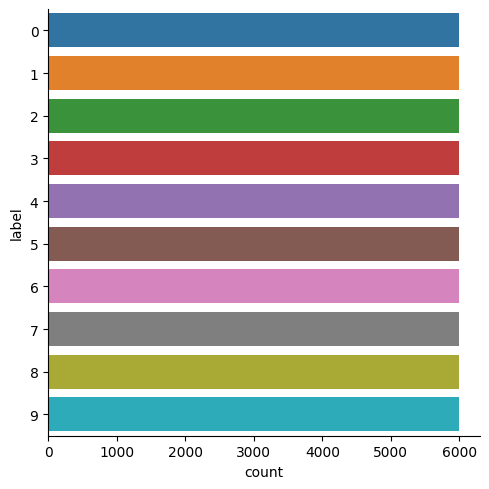

In [ ]:
#Plotting the catplot
sb.catplot(y = "label", data = label_data, kind = "count")

The catplot shows that the train dataset has equal distribution of all classes, which shows that the dataset is quite balanced

Enter a pixel number between 0 and 784:76


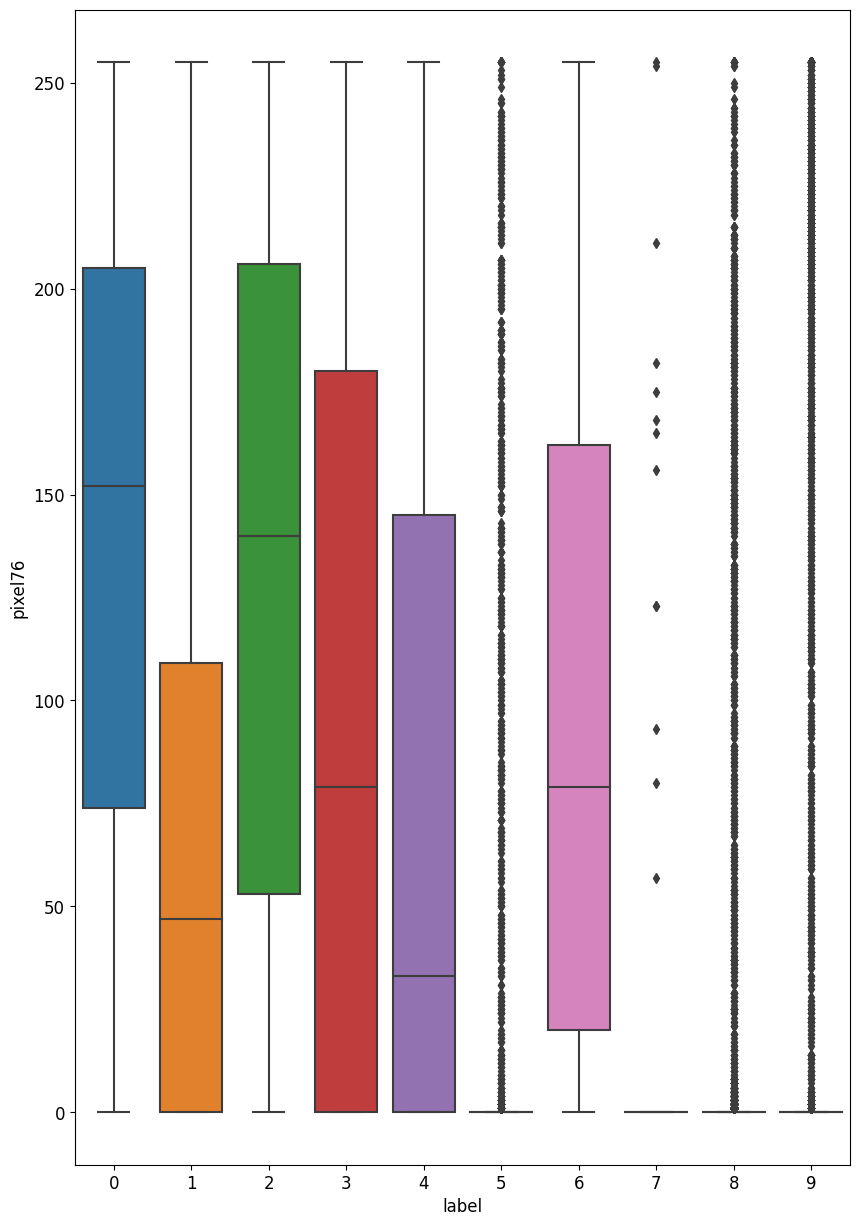

In [ ]:
# Plotting Boxplots for Label vs Pixel
while True:
    try:
        a = int(input("Enter a pixel number between 0 and 784:"))
        if 0 <= a <= 784:
            break
        else:
            print("The number must be between 0 and 784. Try again...")
    except ValueError:
        print("That was not a valid number. Try again...")

f, axes = plt.subplots(1, 1, figsize=(10, 15))
sb.boxplot(x = 'label', y = 'pixel' + str(a) , data = train_data)
plt.show()

Enter a pixel number between 0 and 784:76


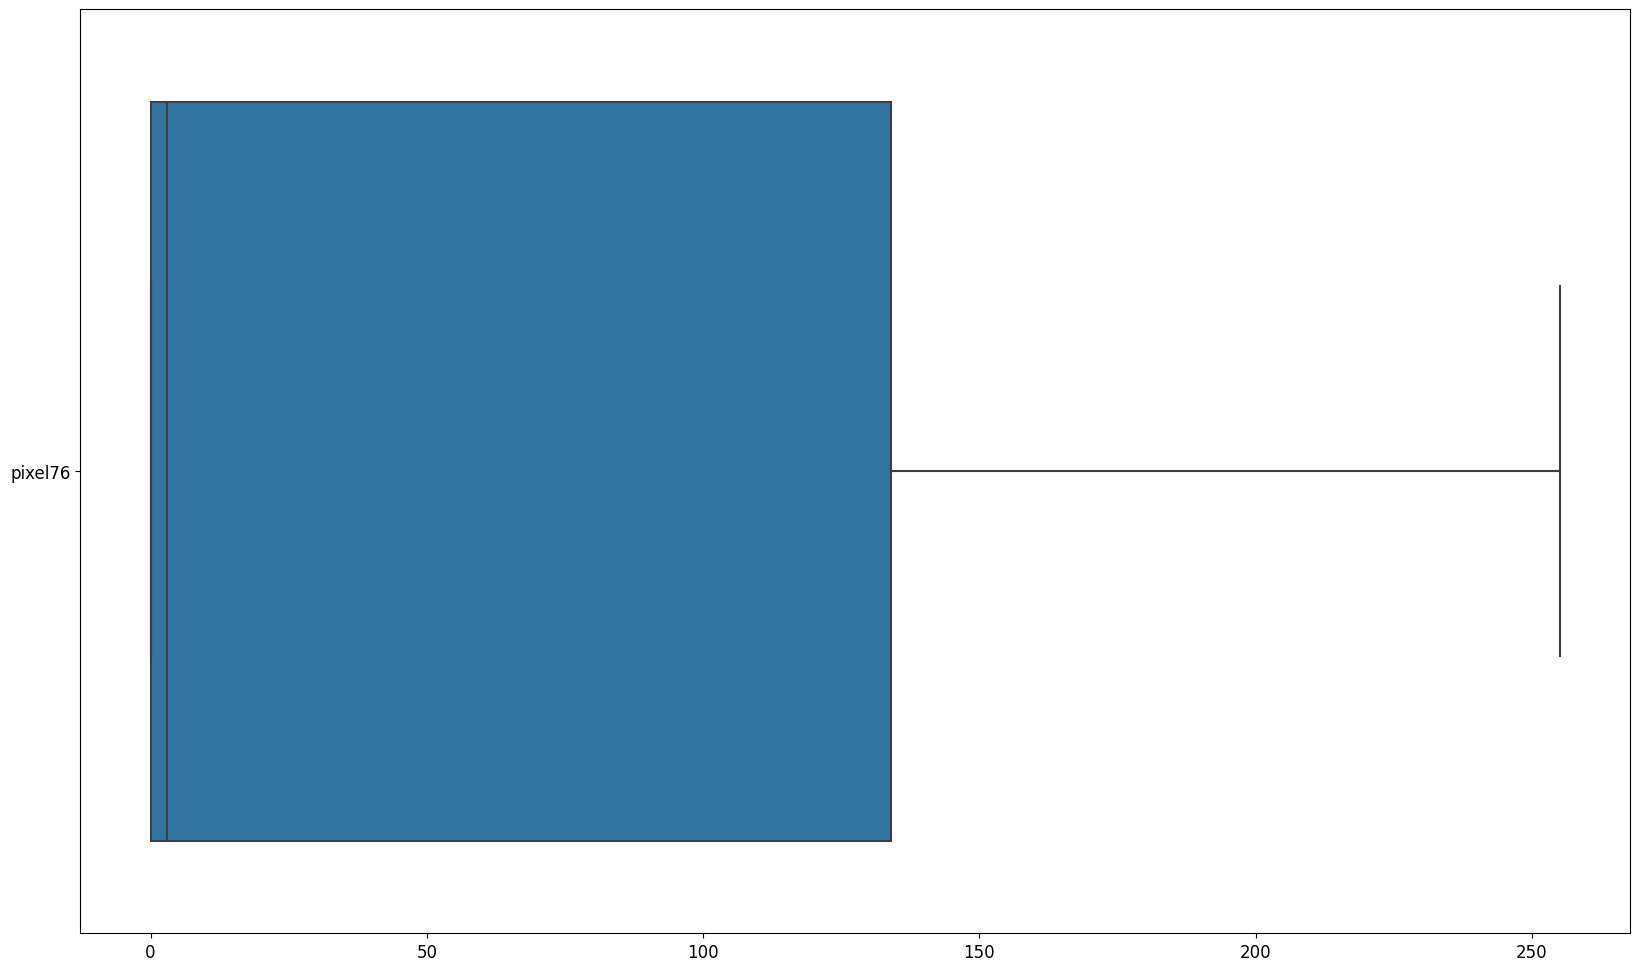

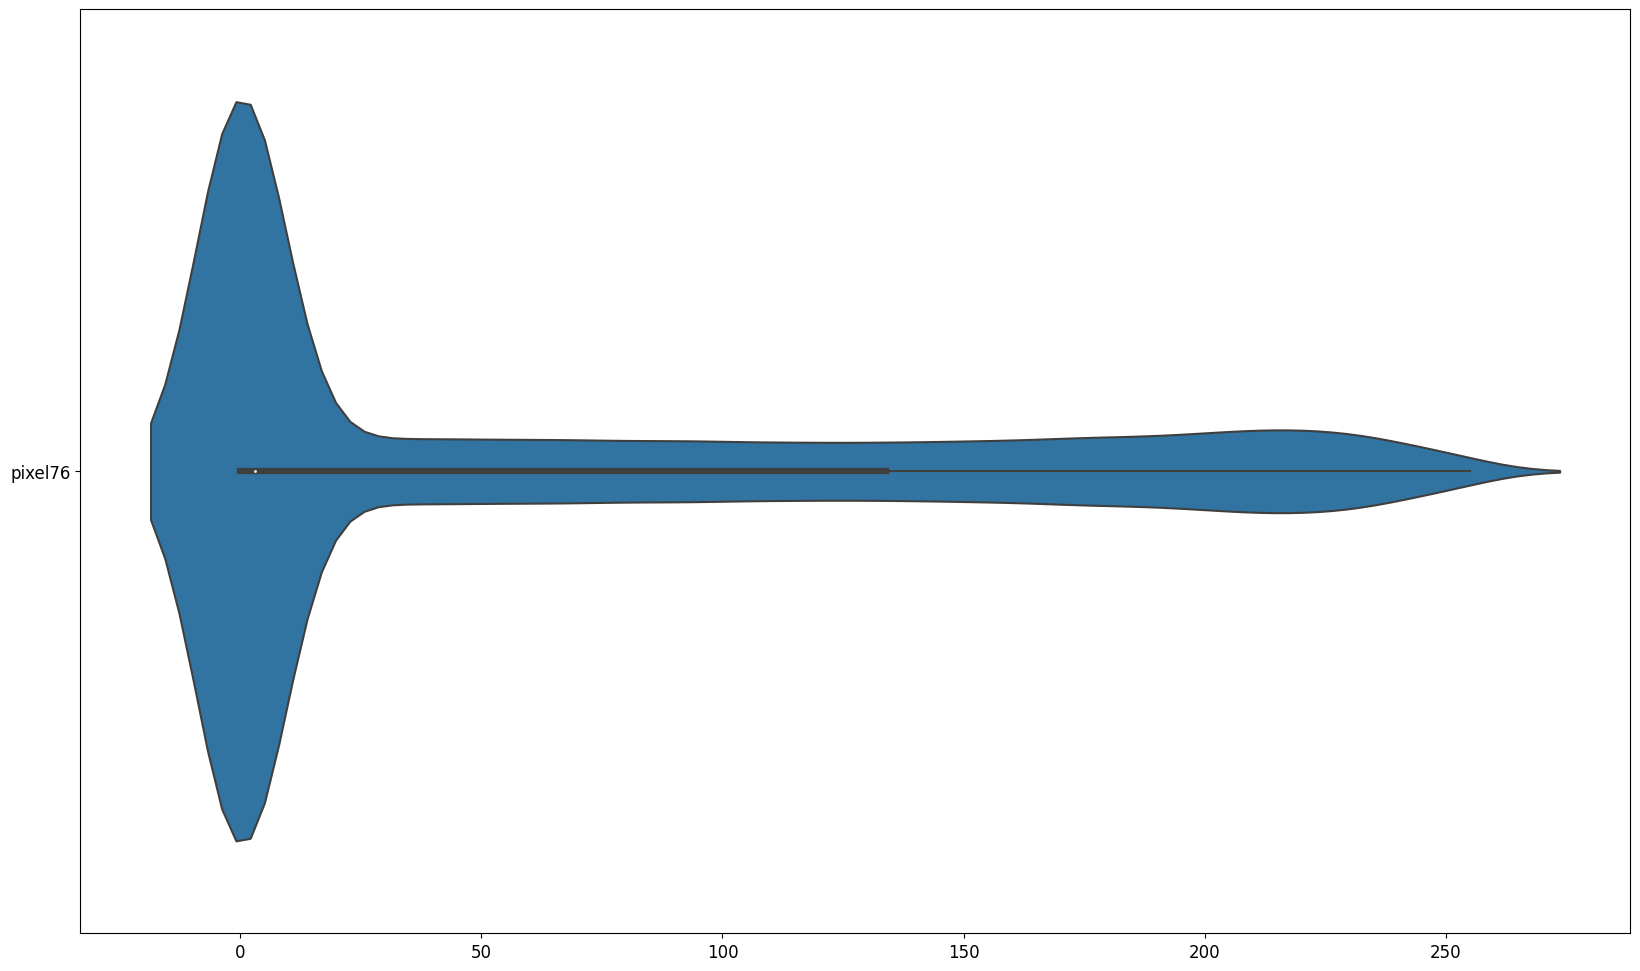

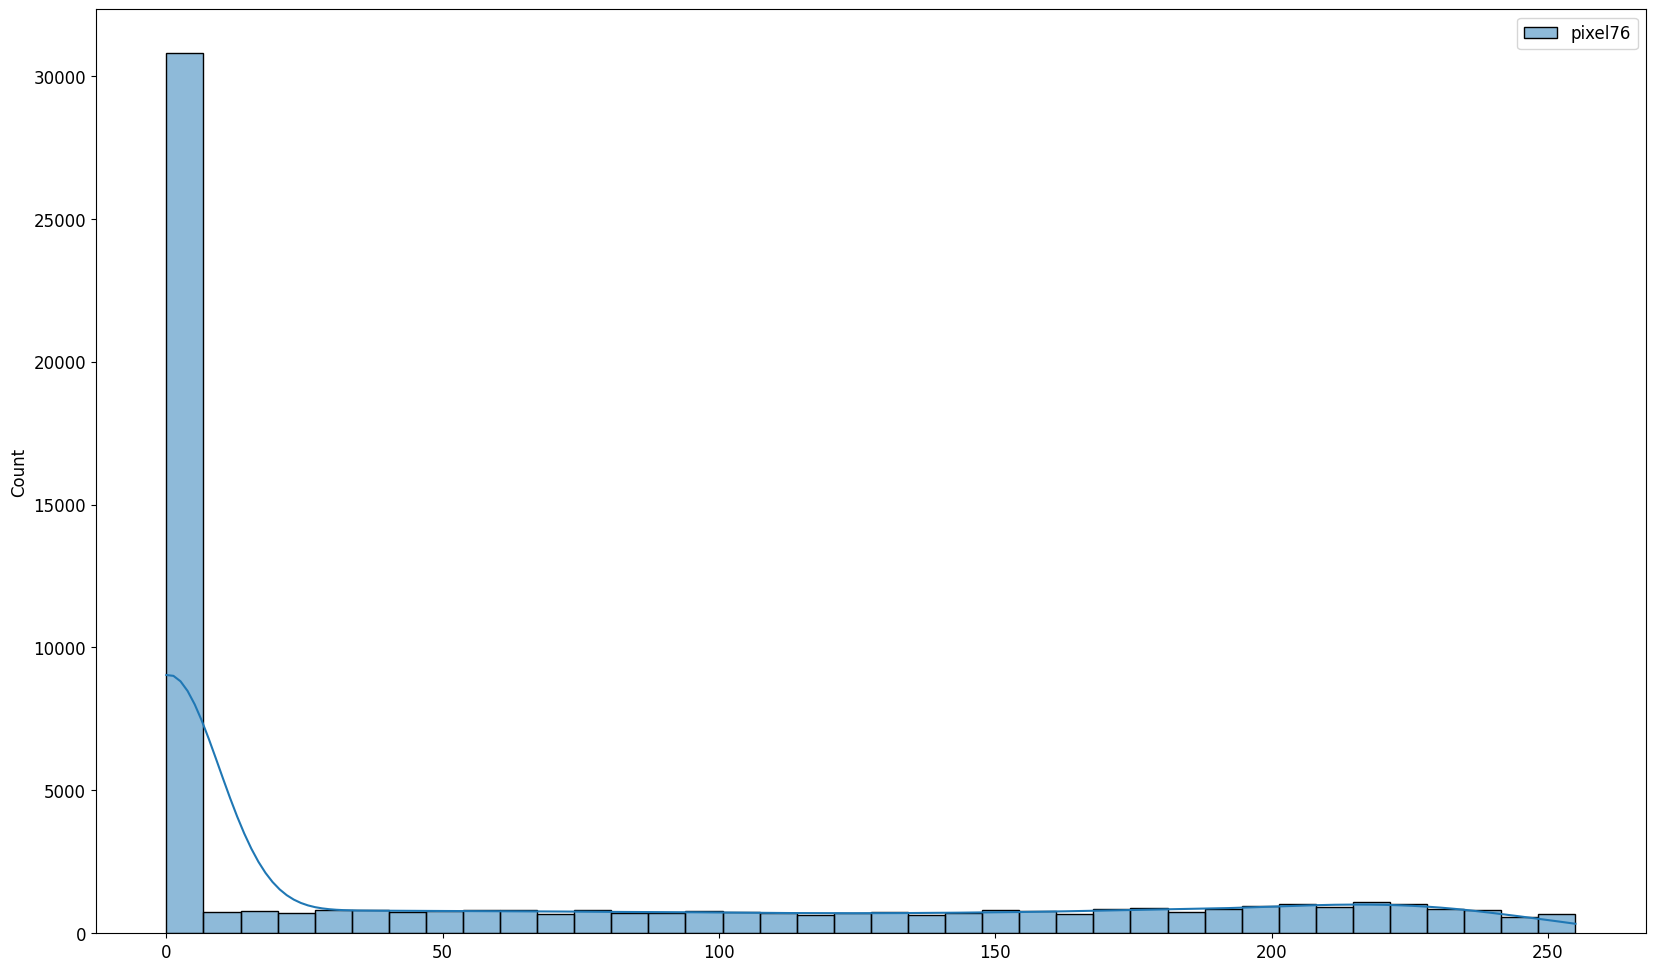

In [ ]:
# Plots for pixel values
while True:
    try:
        k = int(input("Enter a pixel number between 0 and 784:"))
        if 0 <= k <= 784:
            break
        else:
            print("The number must be between 0 and 784. Try again...")
    except ValueError:
        print("That was not a valid number. Try again...")

K_input=pd.DataFrame(train_data['pixel' + str(k)])
f = plt.figure(figsize=(20, 12))
sb.boxplot(data=K_input, orient ="h")
f = plt.figure(figsize=(20, 12))
sb.violinplot(data=K_input, orient = "h")
f = plt.figure(figsize=(20, 12))
sb.histplot(data=K_input,kde='True')

plt.show()

Enter a pixel number between 0 and 784:76


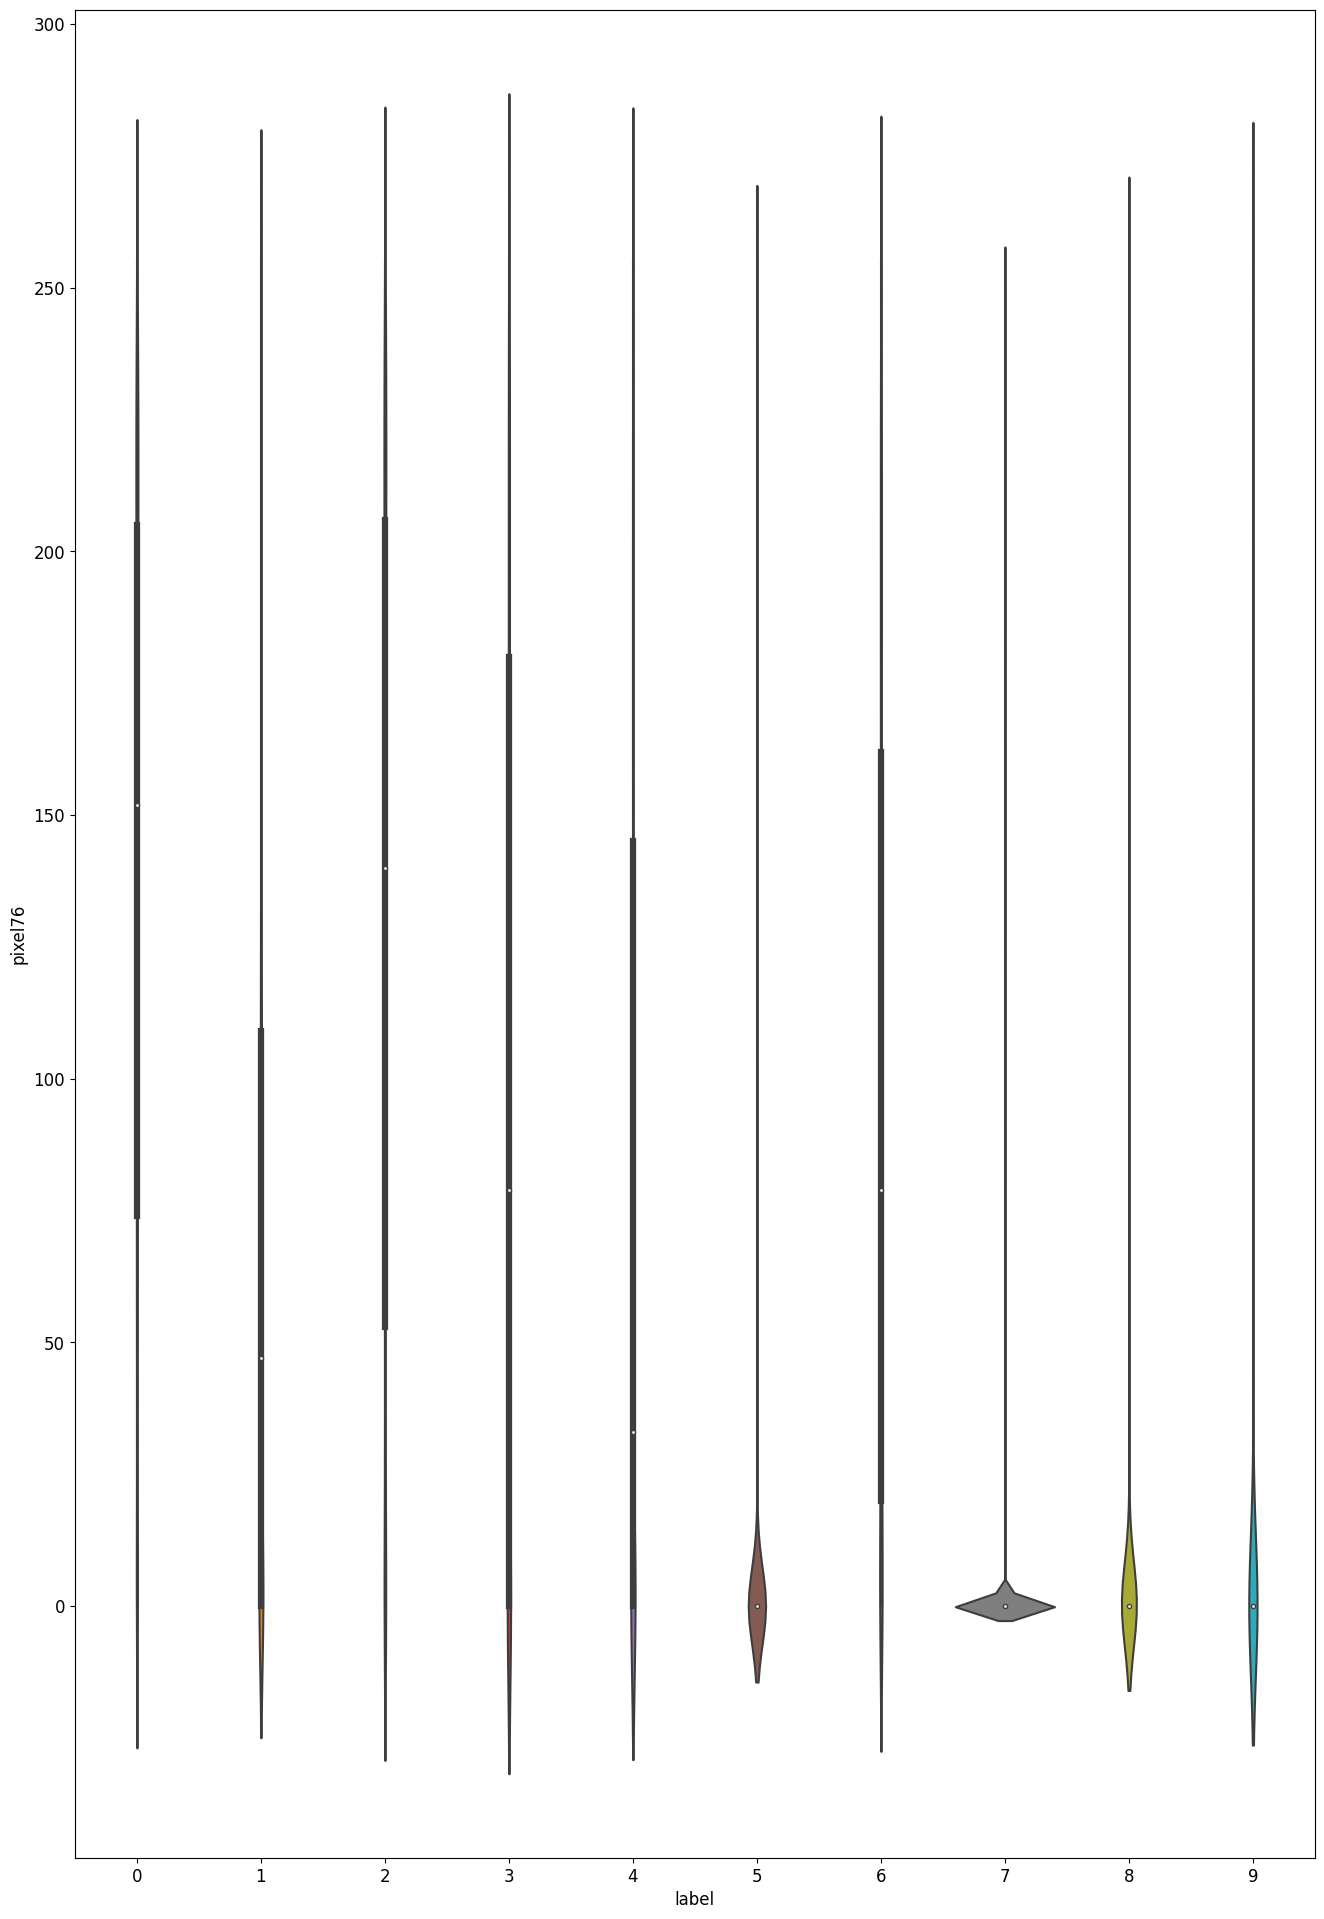

In [ ]:
# Violin Plot Pixel vs Label
while True:
    try:
        a = int(input("Enter a pixel number between 0 and 784:"))
        if 0 <= a <= 784:
            break
        else:
            print("The number must be between 0 and 784. Try again...")
    except ValueError:
        print("That was not a valid number. Try again...")

f, axes = plt.subplots(1, 1, figsize=(16, 24))
sb.violinplot(x = 'label', y = 'pixel' + str(a) , data = train_data)

plt.show()

Enter a pixel number between 0 and 784:76


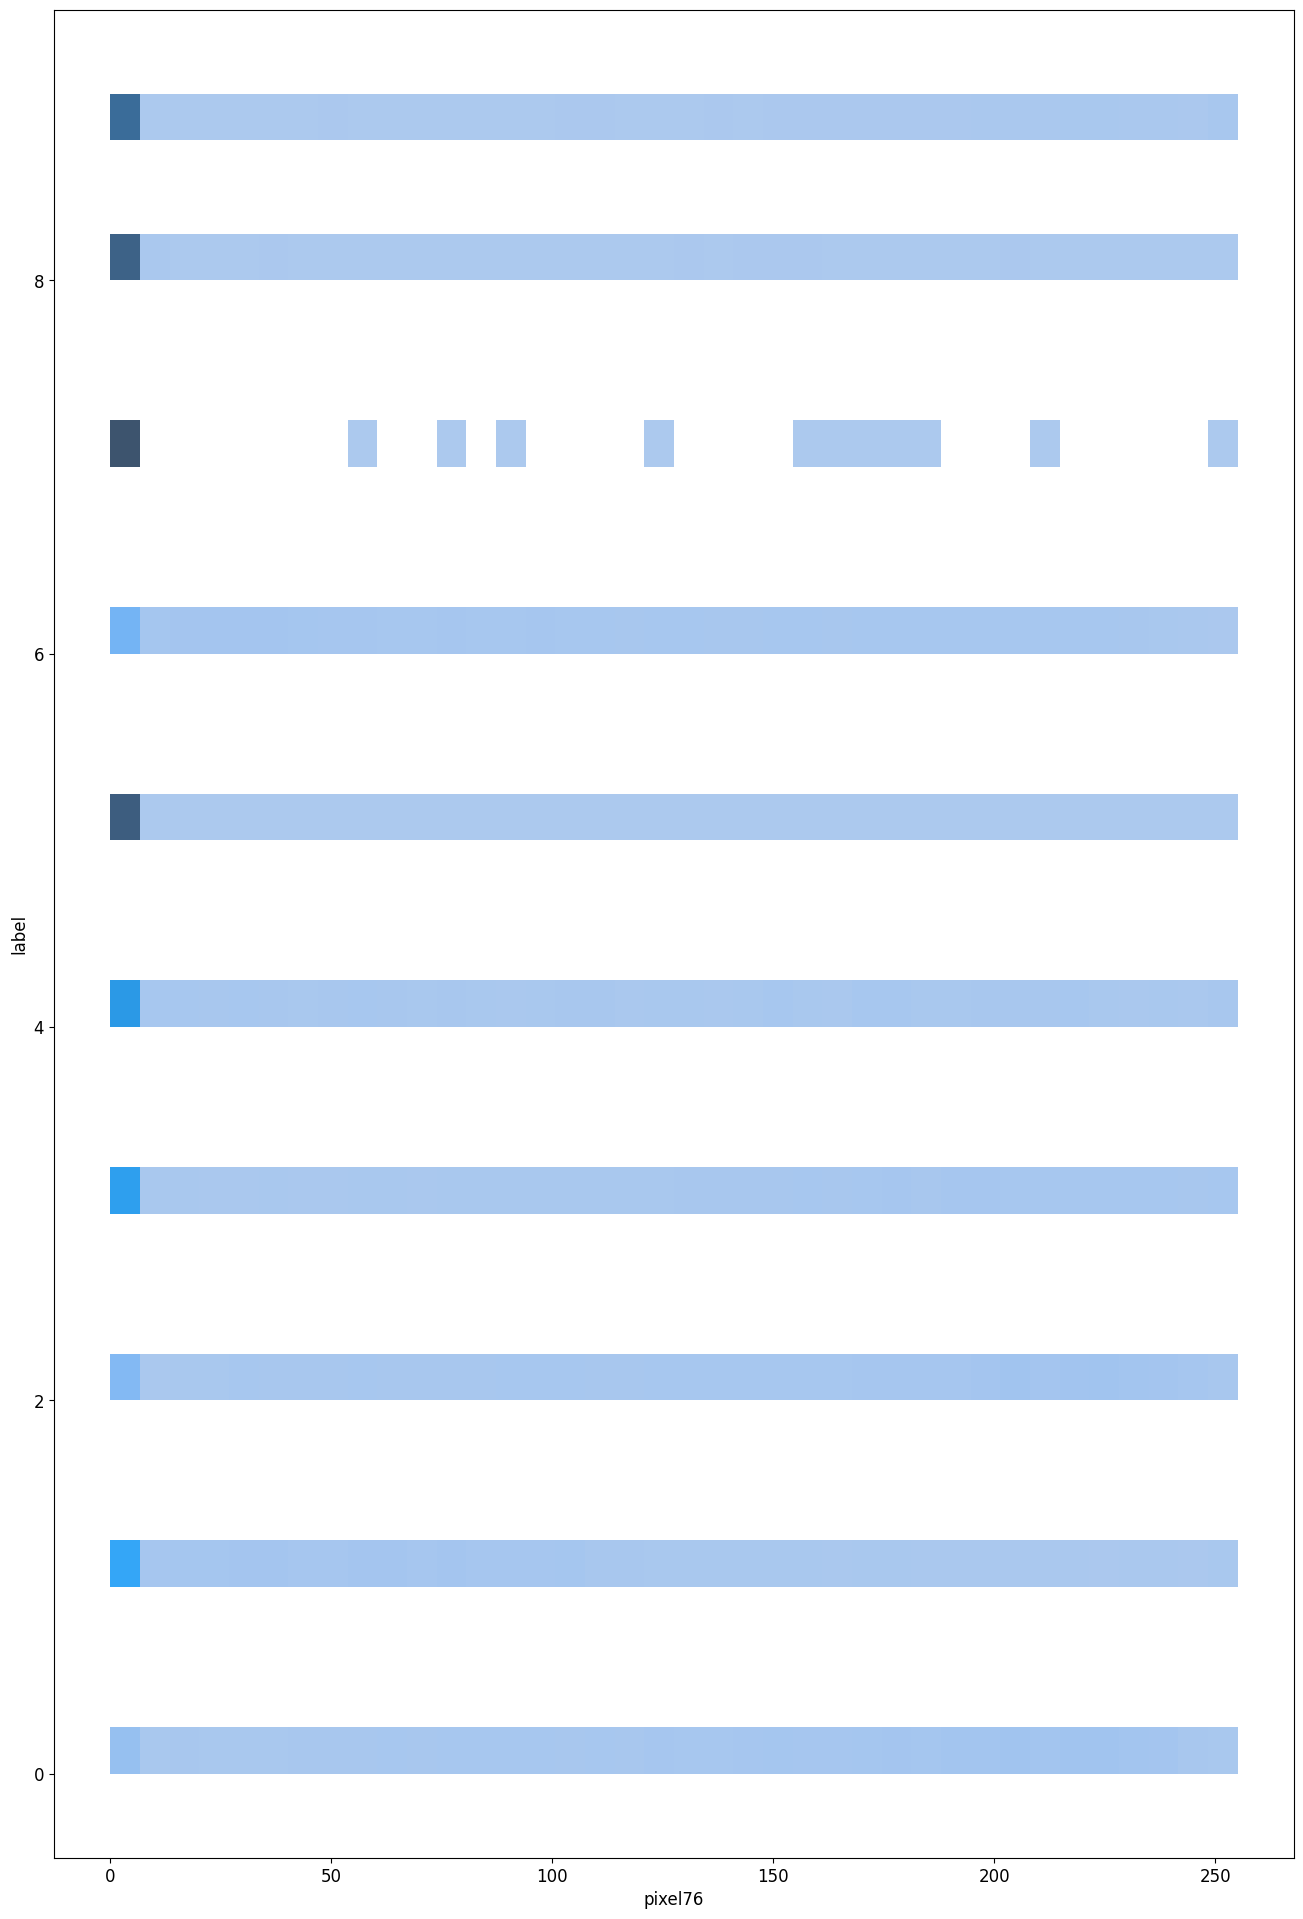

In [ ]:
#Histogram for pixel vs label
while True:
    try:
        a = int(input("Enter a pixel number between 0 and 784:"))
        if 0 <= a <= 784:
            break
        else:
            print("The number must be between 0 and 784. Try again...")
    except ValueError:
        print("That was not a valid number. Try again...")

f, axes = plt.subplots(1, 1, figsize=(16, 24))
sb.histplot(y = 'label', x = 'pixel' + str(a) , data = train_data)

plt.show()

**Data Pre-Processing**

In [ ]:
#Importing Necessary Libraries
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.optimizers import Adam

We have used tensor flow library, which is an open-source software library that is used to build and train machine learning models, including Convolutional Neural Networks.In a CNN model architecture, TensorFlow plays a crucial role in implementing the layers of the network, including convolutional layers, pooling layers, and fully connected layers.

In [ ]:
#Creating the test and train datasets
X_train = train_data.iloc[:, 1:].values
y_train = to_categorical(train_data.iloc[:, 0], 10)
X_test = test_data.iloc[:, 1:].values
y_test = to_categorical(test_data.iloc[:, 0], 10)


Normalization of pixel values to the range of 0 to 1, as it helps to make the data more consistent and easier to train, and can prevent issues such as vanishing or exploding gradients.


In [ ]:
# Normalizing the pixel values
X_train = X_train/255.0
X_test = X_test/255.0

Data augmentation involves applying various transformations to the training images, such as rotation, scaling, flipping, and shifting, to generate new augmented images.

In [ ]:
# Data Augmentation
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(X_train.reshape(-1, 28, 28, 1))

Principal Component Analysis is a statistical technique used to reduce the number of variables in a dataset while preserving the most important information in the data.

In [ ]:
# Principal Component Analysis(PCA)
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

**Convolutional Neural Network(CNN)**

It is used in image and video recognition tasks. It is designed to automatically learn and extract features from input images using a series of layers to produce the desired classification output


In [ ]:
# Model Architecture
model = Sequential()

# Convolutional Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Max Pooling Layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout Layer is added to prevent overfitting
model.add(Dropout(0.25))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten Layer
model.add(Flatten())

# Dense Layer
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(datagen.flow(X_train.reshape(-1, 28, 28, 1), y_train, batch_size=32), epochs=30, validation_data=(X_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/30
1875/1875 [==============================] - 274s 146ms/step - loss: 0.7317 - accuracy: 0.7237 - val_loss: 0.4115 - val_accuracy: 0.8406
Epoch 2/30
1875/1875 [==============================] - 281s 150ms/step - loss: 0.5134 - accuracy: 0.8093 - val_loss: 0.3591 - val_accuracy: 0.8662
Epoch 3/30
1875/1875 [==============================] - 269s 143ms/step - loss: 0.4510 - accuracy: 0.8351 - val_loss: 0.3237 - val_accuracy: 0.8787
Epoch 4/30
1875/1875 [==============================] - 267s 143ms/step - loss: 0.4216 - accuracy: 0.8458 - val_loss: 0.2917 - val_accuracy: 0.8926
Epoch 5/30
1875/1875 [==============================] - 269s 143ms/step - loss: 0.3946 - accuracy: 0.8565 - val_loss: 0.2887 - val_accuracy: 0.8915
Epoch 6/30
1875/1875 [==============================] - 271s 145ms/step - loss: 0.3759 - accuracy: 0.8632 - val_loss: 0.3041 - val_accuracy: 0.8854
Epoch 7/30
1875/1875 [==============================] - 272s 145ms/step - loss: 0.3697 - accuracy: 0.8671 - val_

In [ ]:
# Predicting on the train dataset
y_pred_train = model.predict(X_train.reshape(-1, 28, 28, 1))
y_pred_classes_train = np.argmax(y_pred_train, axis=1)
y_train_classes = np.argmax(y_train, axis=1)

1875/1875 [==============================] - 59s 31ms/step


In [ ]:
# Predicting on the test dataset
y_pred_test = model.predict(X_test.reshape(-1, 28, 28, 1))
y_pred_classes_test = np.argmax(y_pred_test, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

313/313 [==============================] - 9s 27ms/step


**EVALUATION METHODS (FOR CNN)**

Evaluation Methods are performed on both the train and test dataset in order to test the accuracy of the model

**Evaluation Metrics**

**ACCURACY :** Accuracy is the ratio of correctly predicted observations to the total number of observations.

Accuracy= (TP + TN) / (TP + TN + FP + FN)

**Precision:** It is the ratio of true positive predictions to the total number of positive predictions.

Precision= TP / (TP + FP)

**Recall:** It is defined as the ratio of true positive predictions to the total number of actual positive cases.

Recall=  TP / (TP + FN)

**F1-Score:** It is the weighted average of precision and recall, where the F1 score reaches its best value at 1 and worst score at 0.

F1- Score = 2 * Precision * Recall / (Precision + Recall)

In [ ]:
# Creating the CLassification Report(Train Data)
from sklearn.metrics import classification_report
print('Classification Report: TRAIN DATA')
print(classification_report(y_train_classes, y_pred_classes_train))

Classification Report: TRAIN DATA
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      6000
           1       0.98      0.99      0.99      6000
           2       0.92      0.86      0.89      6000
           3       0.89      0.94      0.92      6000
           4       0.87      0.88      0.88      6000
           5       0.98      0.99      0.98      6000
           6       0.75      0.80      0.77      6000
           7       0.96      0.97      0.96      6000
           8       0.99      0.99      0.99      6000
           9       0.98      0.96      0.97      6000

    accuracy                           0.92     60000
   macro avg       0.92      0.92      0.92     60000
weighted avg       0.92      0.92      0.92     60000



In [ ]:
#Creating the CLassification Report(Test Data)
print('Classification Report: TEST DATA')
print(classification_report(y_test_classes, y_pred_classes_test))

Classification Report: TEST DATA
              precision    recall  f1-score   support

           0       0.87      0.80      0.84      1000
           1       0.98      0.99      0.98      1000
           2       0.93      0.85      0.89      1000
           3       0.89      0.94      0.92      1000
           4       0.87      0.87      0.87      1000
           5       0.97      0.98      0.98      1000
           6       0.71      0.78      0.75      1000
           7       0.95      0.95      0.95      1000
           8       0.98      0.99      0.99      1000
           9       0.97      0.96      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
#Calculating precision, Score and Recall(Train Data)
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, support = precision_recall_fscore_support(y_train_classes, y_pred_classes_train, average='weighted')
print('TRAIN DATA')
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)
print('Support:', support)

TRAIN DATA
Precision: 0.9219357269713261
Recall: 0.9206333333333333
F1-score: 0.9208474204023984
Support: None


In [ ]:
#Calculating precision, Score and Recall(Test Data)
print('TEST DATA')
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)
print('Support:', support)

TEST DATA
Precision: 0.9130979312242382
Recall: 0.9114
F1-score: 0.9117053120809978
Support: None


In [ ]:
#Calculating the Accuracy(Train Data)
train_loss, train_acc = model.evaluate(X_train.reshape(-1, 28, 28, 1), y_train)
print('Train accuracy:', train_acc)

1875/1875 [==============================] - 60s 32ms/step - loss: 0.2133 - accuracy: 0.9206
Train accuracy: 0.9206333160400391


In [ ]:
#Calculating the Accuracy(Test Data)
test_loss, test_acc = model.evaluate(X_test.reshape(-1, 28, 28, 1), y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 11s 34ms/step - loss: 0.2368 - accuracy: 0.9114
Test accuracy: 0.9114000201225281


Accuracy on Train Data: 92%

Accuracy on Test Data : 91.1%

In [ ]:
#Plotting the Confusion Matrix(Train Data)
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: TRAIN DATA')
print(confusion_matrix(y_train_classes, y_pred_classes_train))

Confusion Matrix: TRAIN DATA
[[4949    4   50  177    6    1  797    0   15    1]
 [   0 5949    0   37    4    0    7    0    3    0]
 [  75    2 5167   70  331    0  354    0    1    0]
 [  47   69   12 5650   86    1  133    0    2    0]
 [   2    8  132  237 5302    0  314    0    5    0]
 [   1    0    0    0    0 5941    0   39    0   19]
 [ 420   11  255  161  335    0 4806    0   11    1]
 [   0    0    0    0    0   89    0 5802    0  109]
 [  14    1    4    6   13   13   24   10 5913    2]
 [   0    0    0    0    0   34    0  205    2 5759]]


In [ ]:
#Plotting the Confusion Matrix(Train Data)
print('Confusion Matrix: TEST DATA')
print(confusion_matrix(y_test_classes, y_pred_classes_test))

Confusion Matrix: TEST DATA
[[803   3  10  21   0   0 156   0   7   0]
 [  0 990   0   7   1   0   2   0   0   0]
 [ 21   0 850  12  56   0  61   0   0   0]
 [  7  14   0 938  13   0  27   0   1   0]
 [  0   2  23  37 871   0  63   0   4   0]
 [  0   0   1   0   0 982   0  14   2   1]
 [ 87   5  29  34  63   0 780   0   2   0]
 [  0   0   0   0   0  25   0 951   0  24]
 [  2   1   0   1   1   3   4   0 988   0]
 [  1   0   0   0   0   4   0  34   0 961]]


**Precision Recall Curve**

A Precision-Recall (PR) curve shows the tradeoff between precision and recall at different thresholds .



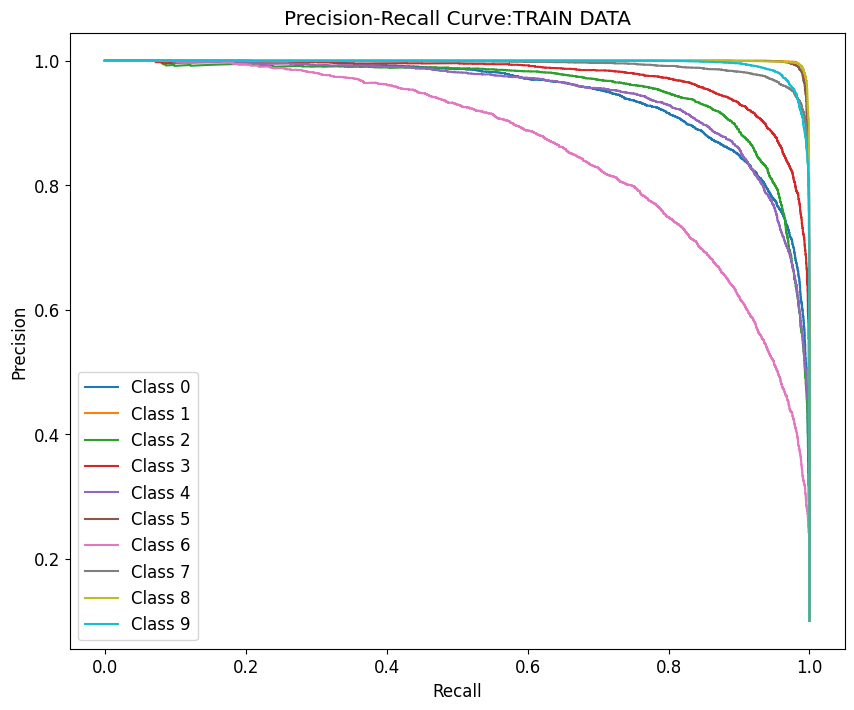

In [ ]:
#Plotting the PRECISION-RECALL Curve(Train Data)
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision and recall for each class
precision = dict()
recall = dict()
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_train[:, i], y_pred_train[:, i])

# Plot the precision-recall curves for each class
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 12})
plt.title('Precision-Recall Curve:TRAIN DATA')
plt.xlabel('Recall')
plt.ylabel('Precision')
for i in range(10):
    plt.plot(recall[i], precision[i], label='Class {}'.format(i))
plt.legend(loc='best')
plt.show()

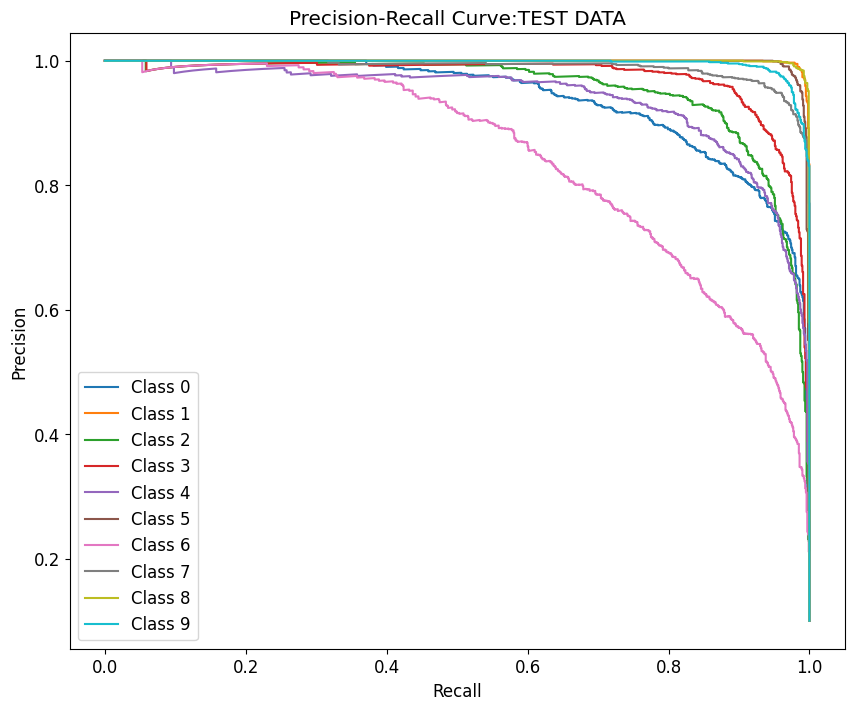

In [ ]:
#Plotting the PRECISION-RECALL Curve(Test Data)
# Calculate precision and recall for each class
precision = dict()
recall = dict()
for i in range(10):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_pred_test[:, i])

# Plot the precision-recall curves for each class
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 12})
plt.title('Precision-Recall Curve:TEST DATA')
plt.xlabel('Recall')
plt.ylabel('Precision')
for i in range(10):
    plt.plot(recall[i], precision[i], label='Class {}'.format(i))
plt.legend(loc='best')
plt.show()

**ROC CURVE**

It is a representation of a binary classifier's performance by plotting the true positive rate (TPR) against the false positive rate (FPR) for different classes.


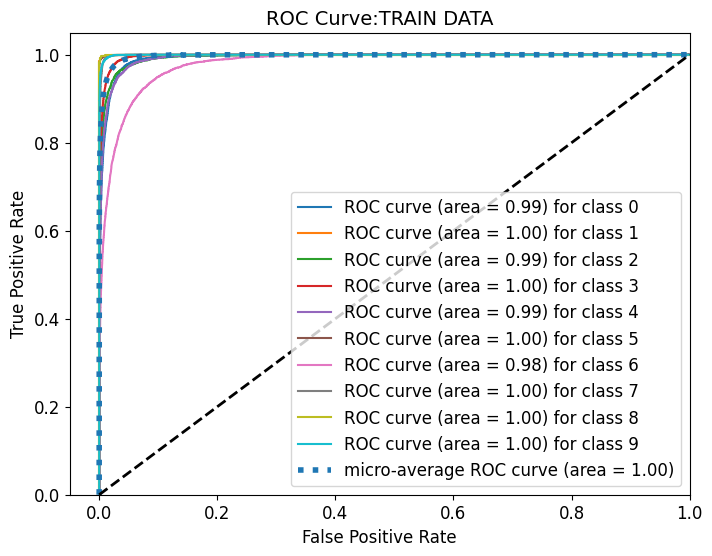

In [ ]:
#Plotting the ROC Curve(Train Data)
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_train[:, i], y_pred_train[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_train.ravel(), y_pred_train.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class and micro-average ROC curve
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = %0.2f)' % roc_auc["micro"],
         linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve:TRAIN DATA', fontsize=14)
plt.legend(loc="lower right")
plt.show()


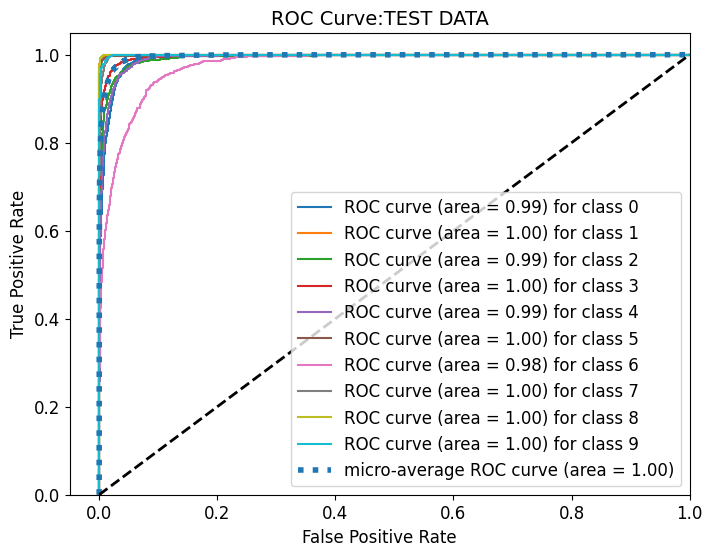

In [ ]:
#Plotting the ROC Curve(Test Data)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred_test[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred_test.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve for each class and micro-average ROC curve
plt.figure(figsize=(8, 6))
for i in range(10):
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot(fpr["micro"], tpr["micro"], label='micro-average ROC curve (area = %0.2f)' % roc_auc["micro"],
         linestyle=':', linewidth=4)

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve:TEST DATA', fontsize=14)
plt.legend(loc="lower right")
plt.show()


**OTHER MODELS:SVM AND RANDOM FOREST CLASSIFIER**

In [ ]:
#Creating the train and test datasets
X_train_model = train_data.iloc[:, 1:].values
y_train_model = train_data.iloc[:, 0]
X_test_model = test_data.iloc[:, 1:].values
y_test_model = test_data.iloc[:, 0]
X_train_model = X_train_model.reshape((-1, 28*28))
X_test_model = X_test_model.reshape((-1, 28*28))

X_train_model = X_train_model / 255.0
X_test_model = X_test_model / 255.0

**SUPPORT VECTOR MACHINE**

It is a type of machine learning algorithm used for classification and regression tasks. It works by finding the best possible decision boundary that can separate different classes or predict target values.


In [ ]:
#Importing Libraries for SVM
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import accuracy_score

#Creating the Model Architecture
svm_model = svm.SVC(kernel='rbf',C=1)

# Train the SVM model on the training data
svm_model.fit(X_train_model, y_train_model)

# Use the trained model to make predictions on the test data
y_pred = svm_model.predict(X_test_model)


In [ ]:
# predict the labels of the train set
y_pred_svm_train = svm_model.predict(X_train_model)
# predict the labels of the test set
y_pred_svm_test = svm_model.predict(X_test_model)

In [ ]:
# evaluate the model's accuracy(Train)
accuracy_svm_train = accuracy_score(y_train_model, y_pred_svm_train)
print("Train Accuracy:", accuracy_svm_train)

Train Accuracy: 0.91105


In [ ]:
# evaluate the model's accuracy(Test)
accuracy_svm_test = accuracy_score(y_test_model, y_pred_svm_test)
print("Test Accuracy:", accuracy_svm_test)

Test Accuracy: 0.8921


**Accuracy on Train Data:**  91.1%

**Accuracy on Train Data:**  89.2%

In [ ]:
#Calculateing precision, recall ,F1-Score(Train)
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, support = precision_recall_fscore_support(y_train_model, y_pred_svm_train, average='weighted')
print('TRAIN DATA')
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)
print('Support:', support)

TRAIN DATA
Precision: 0.9107777228476872
Recall: 0.91105
F1-score: 0.9106044670845629
Support: None


In [ ]:
#Calculateing precision, recall ,F1-Score(Test)
precision, recall, f1_score, support = precision_recall_fscore_support(y_test_model, y_pred_svm_test, average='weighted')
print('TEST DATA')
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)
print('Support:', support)

TEST DATA
Precision: 0.8915408418623145
Recall: 0.8921
F1-score: 0.8915003945780919
Support: None


In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix(Train)
print('Confusion Matrix: TRAIN DATA')
cm_train = confusion_matrix(y_train_model, y_pred_svm_train)
print(cm_train)

Confusion Matrix: TRAIN DATA
[[5346    2   64  153   10    3  390    0   31    1]
 [  19 5833   11  116    8    0   12    0    1    0]
 [  56    2 5109   56  467    1  298    0   11    0]
 [ 113   10   37 5573  148    0  108    0   11    0]
 [   6    4  331  169 5207    0  274    0    9    0]
 [   0    0    1    2    0 5808    0  150   12   27]
 [ 711    6  457  132  341    0 4317    0   35    1]
 [   0    0    0    0    0   83    0 5793    7  117]
 [   8    2   16   23   19    5   32   11 5884    0]
 [   0    0    0    1    0   38    0  167    1 5793]]


In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix(Test)
print('Confusion Matrix: TEST DATA')
cm_test = confusion_matrix(y_test_model, y_pred_svm_test)
print(cm_test)

Confusion Matrix: TEST DATA
[[857   0  11  28   0   2  91   0  11   0]
 [  2 973   3  16   0   1   5   0   0   0]
 [ 10   1 823  14  86   0  62   0   4   0]
 [ 27   7   7 919  22   0  17   0   1   0]
 [  0   0  55  27 869   0  47   0   2   0]
 [  0   0   0   0   0 938   1  43   3  15]
 [151   0  81  28  57   0 675   0   8   0]
 [  0   0   0   0   0  20   0 943   0  37]
 [  5   0   5   3   1   2  10   3 970   1]
 [  0   0   0   0   0   9   0  37   0 954]]


**RANDOM FOREST CLASSIFIER**

A Random Forest Classifier is a type of machine learning algorithm used for classification tasks. It works by constructing multiple decision trees and combining their outputs to make predictions.


In [ ]:
#Import Necessary Libraries
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Applying PCA(Principal Component Analysis)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_model)
X_test_pca = pca.transform(X_test_model)

# train a random forest classifier on the reduced data
rfc_pca = RandomForestClassifier(n_estimators=200, random_state=42)
rfc_pca.fit(X_train_pca, y_train_model)


RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
# predict the labels of the train data
y_pred_rfc_train = rfc_pca.predict(X_train_pca)
# predict the labels of the test data
y_pred_rfc_test = rfc_pca.predict(X_test_pca)

In [ ]:
# Computing Accuracy for Train Data
from sklearn.metrics import accuracy_score
accuracy_rfc_train = accuracy_score(y_train_model, y_pred_rfc_train)
print("Train Accuracy:", accuracy_rfc_train)

Train Accuracy: 1.0


In [ ]:
#Computing Accuracy for Test Data
from sklearn.metrics import accuracy_score
accuracy_rfc_test = accuracy_score(y_test_model, y_pred_rfc_test)
print("Test Accuracy:", accuracy_rfc_test)

Test Accuracy: 0.8664


**Accuracy on Train Data:** 100%

**Accuracy on Test Data:**  86.6%

In [ ]:
# Compute confusion matrix(Train Data)
from sklearn.metrics import confusion_matrix
print('Confusion Matrix: TRAIN DATA')
cm_rfc_train = confusion_matrix(y_train_model, y_pred_rfc_train)
print(cm_rfc_train)

Confusion Matrix: TRAIN DATA
[[6000    0    0    0    0    0    0    0    0    0]
 [   0 6000    0    0    0    0    0    0    0    0]
 [   0    0 6000    0    0    0    0    0    0    0]
 [   0    0    0 6000    0    0    0    0    0    0]
 [   0    0    0    0 6000    0    0    0    0    0]
 [   0    0    0    0    0 6000    0    0    0    0]
 [   0    0    0    0    0    0 6000    0    0    0]
 [   0    0    0    0    0    0    0 6000    0    0]
 [   0    0    0    0    0    0    0    0 6000    0]
 [   0    0    0    0    0    0    0    0    0 6000]]


In [ ]:
# Compute confusion matrix(Test Data)
print('Confusion Matrix: TEST DATA')
cm_rfc_test = confusion_matrix(y_test_model, y_pred_rfc_test)
print(cm_rfc_test)

Confusion Matrix: TEST DATA
[[858   0  14  27   4   6  76   0  15   0]
 [  3 958  11  22   1   0   5   0   0   0]
 [ 12   0 801   8 108   1  57   0  13   0]
 [ 31   5  12 902  23   1  23   0   3   0]
 [  1   1  70  26 850   0  47   0   5   0]
 [  0   0   0   1   0 915   0  51   7  26]
 [194   1 110  22  73   0 582   0  18   0]
 [  0   0   0   0   0  39   0 899   1  61]
 [  2   0   6   4   3  13   5   6 959   2]
 [  0   0   0   0   0  18   0  42   0 940]]


In [ ]:
#Computing the Precision, Recall, F1-score(Train Data)
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, support = precision_recall_fscore_support(y_train_model, y_pred_rfc_train, average='weighted')
print('TRAIN DATA')
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)
print('Support:', support)

TRAIN DATA
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Support: None


In [ ]:
#Computing the Precision, Recall, F1-score(Test Data)
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1_score, support = precision_recall_fscore_support(y_test_model, y_pred_rfc_test, average='weighted')
print('TEST DATA')
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1_score)
print('Support:', support)

TEST DATA
Precision: 0.8653055932064663
Recall: 0.8664
F1-score: 0.8646563639554188
Support: None


Convolutional Neural Network turns out to be the best model for predicting the label classes in the test dataset according to metrics such as 'Accuracy', 'Precision', 'F1-Score' and 'Recall'

Some reasons why CNNs are typically preferred over SVMs and Random Forests for image classification:

**1.** **CNNs are designed specifically for image processing:** CNNs are specifically designed to handle image data and take advantage of the spatial relationships between pixels in an image. In contrast, SVMs and Random Forests are general-purpose classifiers that can be applied to a wide range of data types, but they do not have the specialized architecture of CNNs.

**2. CNNs can learn hierarchical representations:** CNNs are composed of multiple layers, including convolutional layers and pooling layers, that extract increasingly complex and abstract features from the input image. This hierarchical approach allows CNNs to learn representations that capture the underlying structure of the data, which can be difficult for SVMs and Random Forests to do.

**3. CNNs can handle large datasets:** CNNs can be trained on large datasets of thousands or even millions of images, allowing them to learn more robust and accurate representations of the data. In contrast, SVMs and Random Forests may struggle to handle very large datasets or may require significant preprocessing to reduce the dimensionality of the input data.

Overall, CNNs are a powerful and flexible tool for image classification tasks, and are often preferred over traditional machine learning models like SVMs and Random Forests when working with image data.





